In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
churn_data = pd.read_csv('telecom_churn_data.csv')

In [4]:
churn_data.shape

(99999, 226)

In [5]:
churn_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [7]:
#columns name
list(churn_data.columns.values)


['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [8]:
#missing values
round(churn_data.isnull().sum() * 100 / churn_data.shape[0], 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [9]:
data_percent = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
data_percent_df = pd.DataFrame({'percent_missing': data_percent})

data_percent_df[data_percent_df.percent_missing>10].sort_values(by='percent_missing').shape

(40, 1)

In [10]:
data_percent_df[data_percent_df.percent_missing>10].sort_values(by='percent_missing')

percent_missing
date_of_last_rech_data_8            73.66
night_pck_user_8                    73.66
arpu_2g_8                           73.66
total_rech_data_8                   73.66
arpu_3g_8                           73.66
max_rech_data_8                     73.66
av_rech_amt_data_8                  73.66
fb_user_8                           73.66
count_rech_3g_8                     73.66
count_rech_2g_8                     73.66
count_rech_3g_9                     74.08
night_pck_user_9                    74.08
arpu_2g_9                           74.08
arpu_3g_9                           74.08
av_rech_amt_data_9                  74.08
fb_user_9                           74.08
total_rech_data_9                   74.08
max_rech_data_9                     74.08
date_of_last_rech_data_9            74.08
count_rech_2g_9                     74.08
count_rech_3g_7                     74.43
count_rech_2g_7                     74.43
fb_user_7                           74.43
av_rech_amt_data_7                  74.43
max_rech_data_7                     74.43
date_of_last_rech_data_7            74.43
arpu_3g_7                           74.43
night_pck_user_7                    74.43
arpu_2g_7                           74.43
total_rech_data_7                   74.43
fb_user_6                           74.85
night_pck_user_6                    74.85
count_rech_3g_6                     74.85
arpu_2g_6                           74.85
max_rech_data_6                     74.85
arpu_3g_6                           74.85
av_rech_amt_data_6                  74.85
count_rech_2g_6                     74.85
total_rech_data_6                   74.85
date_of_last_rech_data_6            74.85

In [11]:
'''
Coming back to the question; where we have to identify the High valued customers
This can be derived as 70 percentile of the average recharge amount in the first two months (lets assume value X)

Hence X = (Total call recharge amount + Total Data Recharge amount ) in months 6 and 7 divided by 2

To find the Total call recharge amount we need below fields:
total_rech_amt_6
total_rech_amt_7

To find the Total Data recharge amount we need below fields:
total_rech_data_6
total_rech_data_7
av_rech_amt_data_6
av_rech_amt_data_7


Hence,
Total recharge amount used in month 6 =  total_rech_amt_6 + (total_rech_data_6 * av_rech_amt_data_6)
Total recharge amount used in month 7 =  total_rech_amt_7 + (total_rech_data_7 * av_rech_amt_data_7)

Average recharge amount used in both 6th and 7th month = mean of the total recharge amount used in months 6 and 7

before we preoceed ahead to do the above calculation; lets find out if we have any missing values for above mentioned fields in the dataset

'''

chk_fields1 = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6',	'total_rech_data_7',	
               'total_rech_data_8',	'total_rech_data_9',	'av_rech_amt_data_6',	'av_rech_amt_data_7',	'av_rech_amt_data_8', 
               'av_rech_amt_data_9']

round(churn_data[chk_fields1].isnull().sum() * 100 / churn_data.shape[0], 2)

total_rech_amt_6       0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
total_rech_amt_9       0.00
total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
dtype: float64

In [12]:
#since some of the required fields are with lots of missing values in it; lets impute these fields with value 0

set_fields1 = ['total_rech_data_6',	'total_rech_data_7',	'total_rech_data_8',	'total_rech_data_9',	'av_rech_amt_data_6',	
               'av_rech_amt_data_7',	'av_rech_amt_data_8', 'av_rech_amt_data_9']

churn_data[set_fields1] = churn_data[set_fields1].fillna(0)

In [13]:
#creating derived fields to identify high valued customer.

#calculate total recharge amout used for data in month of June and July
churn_data['total_data_recharged_6'] = churn_data['total_rech_data_6'] * churn_data['av_rech_amt_data_6']
churn_data['total_data_recharged_7'] = churn_data['total_rech_data_7'] * churn_data['av_rech_amt_data_7']

#calculate total recharge amount by adding data recharge amount and call recharge amount FOR month of June and July
churn_data['Total_amt_data_6'] = churn_data[['total_rech_amt_6','total_data_recharged_6']].sum(axis=1)
churn_data['Total_amt_data_7'] = churn_data[['total_rech_amt_7','total_data_recharged_7']].sum(axis=1)

#calculate Average recharge amount FOR month of June and July
churn_data['Avg_rch_amt_data_6_7'] = churn_data[['Total_amt_data_6','Total_amt_data_7']].mean(axis=1)

In [14]:
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [15]:
# 70 percentile of average recharge amount data in months 6 and 7
churn_data['Avg_rch_amt_data_6_7'].quantile(0.7)

478.0

In [16]:
#Dataframe for high valued customer with average recharged amount per month more than 70 percentile
cust_churn_data = churn_data[(churn_data['Avg_rch_amt_data_6_7']>= churn_data['Avg_rch_amt_data_6_7'].quantile(0.7))]

In [17]:
print(cust_churn_data.info())
print(cust_churn_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 231 entries, mobile_number to Avg_rch_amt_data_6_7
dtypes: float64(184), int64(35), object(12)
memory usage: 53.1+ MB
None
(30001, 231)


In [18]:
#find columns with missing values into the final dataset:
cust_data_percent = round(100*(cust_churn_data.isnull().sum()/len(cust_churn_data.index)), 2)
cust_data_percent_df = pd.DataFrame({'percent_missing': cust_data_percent})
cust_data_percent_df[cust_data_percent_df.percent_missing>10].sort_values(by='percent_missing')

percent_missing
date_of_last_rech_data_7            43.15
arpu_2g_7                           43.15
fb_user_7                           43.15
max_rech_data_7                     43.15
arpu_3g_7                           43.15
count_rech_3g_7                     43.15
count_rech_2g_7                     43.15
night_pck_user_7                    43.15
date_of_last_rech_data_6            44.15
arpu_2g_6                           44.15
arpu_3g_6                           44.15
count_rech_3g_6                     44.15
count_rech_2g_6                     44.15
fb_user_6                           44.15
max_rech_data_6                     44.15
night_pck_user_6                    44.15
count_rech_2g_8                     46.83
count_rech_3g_8                     46.83
fb_user_8                           46.83
max_rech_data_8                     46.83
arpu_3g_8                           46.83
night_pck_user_8                    46.83
date_of_last_rech_data_8            46.83
arpu_2g_8                           46.83
night_pck_user_9                    49.27
count_rech_3g_9                     49.27
arpu_3g_9                           49.27
count_rech_2g_9                     49.27
max_rech_data_9                     49.27
date_of_last_rech_data_9            49.27
arpu_2g_9                           49.27
fb_user_9                           49.27

In [19]:
#We have noted down that there are few fields related to reveneu; which can not be removed. these fields are:
'''
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',

 '''
#lets find missing values if any for these fields in the high valued customer data
chk_fields2 = ['arpu_6',  'arpu_7',  'arpu_8',  'arpu_9',  'arpu_3g_6',  'arpu_3g_7',  'arpu_3g_8',  'arpu_3g_9',
                'arpu_2g_6',  'arpu_2g_7',  'arpu_2g_8',  'arpu_2g_9']

round(cust_churn_data[chk_fields2].isnull().sum() * 100 / cust_churn_data.shape[0], 2)

arpu_6        0.00
arpu_7        0.00
arpu_8        0.00
arpu_9        0.00
arpu_3g_6    44.15
arpu_3g_7    43.15
arpu_3g_8    46.83
arpu_3g_9    49.27
arpu_2g_6    44.15
arpu_2g_7    43.15
arpu_2g_8    46.83
arpu_2g_9    49.27
dtype: float64

In [20]:
#for few fields; there are some missing values present; lets impute missing values for these field with 0.
set_fields2 = ['arpu_3g_6',  'arpu_3g_7',  'arpu_3g_8',  'arpu_3g_9',
                'arpu_2g_6',  'arpu_2g_7',  'arpu_2g_8',  'arpu_2g_9']

cust_churn_data[set_fields2] = cust_churn_data[set_fields2].fillna(0)

In [21]:
#lets figure out for any columns which are having constant values in it
tot = cust_churn_data.nunique()
tot_df = pd.DataFrame(tot)
tot_df_cnt_1 = tot_df.loc[tot_df[0] == 1]

tot_df_cnt_1

0
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
last_date_of_month_6  1
last_date_of_month_7  1
last_date_of_month_8  1
last_date_of_month_9  1
std_og_t2c_mou_6      1
std_og_t2c_mou_7      1
std_og_t2c_mou_8      1
std_og_t2c_mou_9      1
std_ic_t2o_mou_6      1
std_ic_t2o_mou_7      1
std_ic_t2o_mou_8      1
std_ic_t2o_mou_9      1

In [22]:
drop_cols1 = list(tot_df_cnt_1.index.values)
drop_cols1

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [23]:
#dropping these fields from high valued customer dataframe
cust_churn_data = cust_churn_data.drop(columns=drop_cols1)

In [24]:
cust_churn_data.shape

(30001, 215)

In [25]:
#validate fields for month 9 to define the "churn" field into the high valued customer dataframe
'''
'total_ic_mou_9'
'total_og_mou_9
'vol_2g_mb_9'
'vol_3g_mb_9'
'''

chk_fields3 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

round(cust_churn_data[chk_fields3].isnull().sum() * 100 / cust_churn_data.shape[0], 2)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [26]:
#no missing values are present in the churn deciding fields for month 9
cust_churn_data['churn'] = cust_churn_data.apply(lambda x: 1 if (x['total_ic_mou_9'] == 0 and x['total_og_mou_9'] == 0 and x['vol_2g_mb_9'] == 0 and x['vol_3g_mb_9'] == 0) else 0, axis=1)

In [27]:
cust_churn_data.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
21     7002124215   514.453   597.753   637.760  578.596       102.41   
23     7000887461    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04    

In [28]:
#dropping all variables(fields) related to month 9

#Before dropping the 9th Month variable; lets
#rename the fields containing jun, jul, aug, sep in it column names to 6, 7, 8 and 9
'''
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g'
'''
cust_churn_data.rename(columns={"aug_vbc_3g": "vbc_3g_8", "jul_vbc_3g": "vbc_3g_7", "jun_vbc_3g": "vbc_3g_6", "sep_vbc_3g": "vbc_3g_9"}, inplace=True)

chk_fields4 = [col for col in cust_churn_data.columns if '_9' in col]
chk_fields4


['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9']

In [29]:
cust_churn_data = cust_churn_data.drop(columns=chk_fields4)
cust_churn_data.shape

(30001, 164)

In [30]:
#check if mobile number is having unique values in it or not
cust_churn_data.mobile_number.nunique()

30001

In [31]:
#from above calculation it shows all mobile numbers are unique and hence does not make any significant role into modelling
cust_churn_data = cust_churn_data.drop(columns=['mobile_number'])
cust_churn_data.shape

(30001, 163)

In [32]:
cust_churn_data['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [33]:
print(cust_churn_data['fb_user_6'].value_counts())
print(cust_churn_data['fb_user_7'].value_counts())
print(cust_churn_data['fb_user_8'].value_counts())

print(cust_churn_data['night_pck_user_6'].value_counts())
print(cust_churn_data['night_pck_user_7'].value_counts())
print(cust_churn_data['night_pck_user_8'].value_counts())

1.0    15525
0.0     1231
Name: fb_user_6, dtype: int64
1.0    15722
0.0     1335
Name: fb_user_7, dtype: int64
1.0    14313
0.0     1640
Name: fb_user_8, dtype: int64
0.0    16349
1.0      407
Name: night_pck_user_6, dtype: int64
0.0    16682
1.0      375
Name: night_pck_user_7, dtype: int64
0.0    15612
1.0      341
Name: night_pck_user_8, dtype: int64


In [34]:
#find columns with missing values into the final dataset:
cust_data_percent = round(100*(cust_churn_data.isnull().sum()/len(cust_churn_data.index)), 2)
cust_data_percent_df = pd.DataFrame({'percent_missing': cust_data_percent})
cust_data_percent_df[cust_data_percent_df.percent_missing>10].sort_values(by='percent_missing')

percent_missing
date_of_last_rech_data_7            43.15
max_rech_data_7                     43.15
count_rech_2g_7                     43.15
fb_user_7                           43.15
count_rech_3g_7                     43.15
night_pck_user_7                    43.15
date_of_last_rech_data_6            44.15
fb_user_6                           44.15
max_rech_data_6                     44.15
count_rech_2g_6                     44.15
count_rech_3g_6                     44.15
night_pck_user_6                    44.15
night_pck_user_8                    46.83
count_rech_2g_8                     46.83
max_rech_data_8                     46.83
date_of_last_rech_data_8            46.83
count_rech_3g_8                     46.83
fb_user_8                           46.83

 Treating Categorical Variables
 There are six categorical columns having more than 40% missing values. Immputing missing values as '-1' and treating it as another category
 - fb_user_6
 - fb_user_7
 - fb_user_8
 - night_pck_user_6
 - night_pck_user_7
 - night_pck_user_8



In [35]:
categorical_variables = ["fb_user_6", "fb_user_7", "fb_user_8", "night_pck_user_6", "night_pck_user_7", "night_pck_user_8"]

In [36]:
for var in categorical_variables:
  cust_churn_data[var].fillna(value = -1, inplace = True)
cust_churn_data.head()


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803          NaN          NaN         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0            NaN           NaN          0.00            NaN            NaN   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00            NaN            NaN           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [37]:
# Creating dummy variables for all the 6 variables
night_pack_users_6_d = pd.get_dummies(cust_churn_data['night_pck_user_6'], prefix  = "night6", drop_first = True)
night_pack_users_7_d = pd.get_dummies(cust_churn_data['night_pck_user_7'], prefix  = "night7", drop_first = True)
night_pack_users_8_d = pd.get_dummies(cust_churn_data['night_pck_user_8'], prefix  = "night8", drop_first = True)

fb_user_6_d = pd.get_dummies(cust_churn_data['fb_user_6'], prefix  = "fb6", drop_first = True)
fb_user_7_d = pd.get_dummies(cust_churn_data['fb_user_7'], prefix  = "fb7", drop_first = True)
fb_user_8_d = pd.get_dummies(cust_churn_data['fb_user_8'], prefix  = "fb8", drop_first = True)

cust_churn_data = pd.concat([cust_churn_data, night_pack_users_6_d], axis = 1)
cust_churn_data = pd.concat([cust_churn_data, night_pack_users_7_d], axis = 1)
cust_churn_data = pd.concat([cust_churn_data, night_pack_users_8_d], axis = 1)

cust_churn_data = pd.concat([cust_churn_data, fb_user_6_d], axis = 1)
cust_churn_data = pd.concat([cust_churn_data, fb_user_7_d], axis = 1)
cust_churn_data = pd.concat([cust_churn_data, fb_user_8_d], axis = 1)

In [38]:
#Drop the categorical columns 
cust_churn_data = cust_churn_data.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

In [39]:
# These columns  date_of_last_rech_data_6, date_of_last_rech_data_7, date_of_last_rech_data_8, max_rech_data_6, max_rech_data_7,
# max_rech_data_8, count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_3g_6, count_rech_3g_7, count_rech_3g_8 are not of much use thus dropping these columns. 

cust_churn_data = cust_churn_data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'], 1)

In [40]:
# Again finding columns with missing values into the final dataset:
cust_data_percent = round(100*(cust_churn_data.isnull().sum()/len(cust_churn_data.index)), 2)
cust_data_percent_df = pd.DataFrame({'percent_missing': cust_data_percent})
cust_data_percent_df[cust_data_percent_df.percent_missing>0].sort_values(by='percent_missing')

percent_missing
date_of_last_rech_6             0.24
date_of_last_rech_7             0.33
loc_ic_t2f_mou_7                1.79
std_og_t2f_mou_7                1.79
std_og_t2m_mou_7                1.79
isd_og_mou_7                    1.79
std_ic_t2f_mou_7                1.79
std_og_t2t_mou_7                1.79
loc_og_mou_7                    1.79
spl_og_mou_7                    1.79
std_ic_mou_7                    1.79
loc_og_t2c_mou_7                1.79
std_ic_t2t_mou_7                1.79
loc_og_t2f_mou_7                1.79
std_ic_t2m_mou_7                1.79
spl_ic_mou_7                    1.79
og_others_7                     1.79
std_og_mou_7                    1.79
onnet_mou_7                     1.79
loc_og_t2t_mou_7                1.79
loc_ic_t2t_mou_7                1.79
isd_ic_mou_7                    1.79
roam_og_mou_7                   1.79
loc_ic_mou_7                    1.79
loc_og_t2m_mou_7                1.79
roam_ic_mou_7                   1.79
loc_ic_t2m_mou_7                1.79
ic_others_7                     1.79
offnet_mou_7                    1.79
std_ic_t2m_mou_6                1.82
isd_og_mou_6                    1.82
std_ic_t2t_mou_6                1.82
loc_ic_t2m_mou_6                1.82
og_others_6                     1.82
loc_ic_t2t_mou_6                1.82
loc_ic_mou_6                    1.82
spl_og_mou_6                    1.82
onnet_mou_6                     1.82
std_og_t2f_mou_6                1.82
offnet_mou_6                    1.82
roam_ic_mou_6                   1.82
ic_others_6                     1.82
roam_og_mou_6                   1.82
loc_og_t2t_mou_6                1.82
isd_ic_mou_6                    1.82
loc_og_t2m_mou_6                1.82
loc_og_t2f_mou_6                1.82
spl_ic_mou_6                    1.82
loc_og_t2c_mou_6                1.82
loc_og_mou_6                    1.82
std_ic_mou_6                    1.82
loc_ic_t2f_mou_6                1.82
std_og_t2m_mou_6                1.82
std_ic_t2f_mou_6                1.82
std_og_mou_6                    1.82
std_og_t2t_mou_6                1.82
date_of_last_rech_8             1.94
loc_ic_t2m_mou_8                3.91
onnet_mou_8                     3.91
ic_others_8                     3.91
offnet_mou_8                    3.91
roam_ic_mou_8                   3.91
isd_ic_mou_8                    3.91
roam_og_mou_8                   3.91
loc_og_t2t_mou_8                3.91
spl_ic_mou_8                    3.91
loc_og_t2m_mou_8                3.91
loc_og_t2f_mou_8                3.91
std_ic_mou_8                    3.91
loc_ic_t2f_mou_8                3.91
loc_og_t2c_mou_8                3.91
std_ic_t2f_mou_8                3.91
std_og_t2t_mou_8                3.91
std_og_t2m_mou_8                3.91
std_ic_t2m_mou_8                3.91
std_og_t2f_mou_8                3.91
std_og_mou_8                    3.91
std_ic_t2t_mou_8                3.91
spl_og_mou_8                    3.91
og_others_8                     3.91
loc_ic_mou_8                    3.91
loc_ic_t2t_mou_8                3.91
loc_og_mou_8                    3.91
isd_og_mou_8                    3.91

In [41]:
cust_churn_data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803          NaN          NaN         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0            NaN           NaN          0.00            NaN            NaN   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00            NaN            NaN           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [42]:
### Treating Row-wise Missing Data

In [43]:

#Summing to check how many rows have missing values
print("Rows with all null values = ",cust_churn_data.isnull().all(axis = 1).sum())

# Sum of missing values in eah row
missing_data_rows = cust_churn_data.isnull().sum(axis = 1)
missing_data_rows[missing_data_rows > 0]

Rows with all null values =  0


0        54
77       27
91        1
111      27
188      28
191       1
358      27
364      27
414      28
423      27
527      27
539      54
588       1
603       2
679       1
687      82
690      28
723      28
788      27
845      28
895      27
933      27
934      27
1138     54
1255     27
1374      1
1489     54
1500     55
1524     28
1555     56
1623     27
1754     27
1768     27
1877     27
1913      1
1952     28
2063     27
2185     81
2197     28
2218     55
2285     81
2352     28
2452     27
2516     54
2533     27
2572     27
2719     27
2750     27
2777      1
3154     81
3289     54
3290     81
3310     27
3364     27
3416     27
3444     54
3468     81
3511     27
3523     55
3543     27
3564     27
3667     28
3696     27
3719     27
3734     27
3754     54
3757      1
3854     28
3865     28
3878     27
4190     83
4284      1
4402     27
4414     28
4439     27
4810     28
4814      1
4820     54
4838     81
4934      1
4960     29
4996     27
5025     27
5074

In [44]:
# There is a small percentage of rows which have more than or equal to 27 missing values
drop_missing_values_rows =  cust_churn_data.isnull().sum(axis = 1) >= 27
print("No of rows having more than or equal to 27 missing values : {}", format(drop_missing_values_rows.sum()))
print("% rows having more than or equal to 27 missing values : {}", format(drop_missing_values_rows.sum()/cust_churn_data.shape[0]*100))

# dropping rows with missing values having values more than 27
cust_churn_data = cust_churn_data[cust_churn_data.isnull().sum(axis = 1) < 27]
print("Dataframe shape after dropping rows : ", cust_churn_data.shape )

No of rows having more than or equal to 27 missing values : {} 1497
% rows having more than or equal to 27 missing values : {} 4.989833672210926
Dataframe shape after dropping rows :  (28504, 157)


In [45]:
missing_data_rows = cust_churn_data.isnull().sum(axis = 1)
print(missing_data_rows[missing_data_rows > 0])

91       1
191      1
588      1
603      2
679      1
1374     1
1913     1
2777     1
3757     1
4284     1
4814     1
4934     1
5187     1
5449     1
5798     1
5926     1
7304     1
7399     1
7567     1
7662     1
7914     1
8118     1
8159     1
8281     1
8454     1
8680     1
8979     1
9012     1
9027     1
9068     1
9086     1
9116     1
9365     1
9773     1
9807     1
10238    1
10386    1
10863    1
10869    1
11117    1
11550    1
11812    1
11954    1
12127    1
12414    1
12428    1
12522    1
12635    1
12701    1
12897    1
13012    1
13764    1
13837    1
14039    2
14920    1
15318    1
15648    2
15972    1
16195    1
16365    1
17020    1
17070    1
17121    1
17386    1
18016    1
18154    1
18546    1
18855    1
18908    1
20503    1
20541    1
20628    1
20729    1
21142    1
21468    1
21537    1
21753    1
21857    1
21923    1
22097    1
22118    1
22158    1
22229    1
23456    1
23795    1
23862    1
24490    1
24823    1
25091    1
25215    1
25540    1

In [46]:
# Checking the column summary again
df = round(100*(cust_churn_data.isnull().sum()/len(cust_churn_data.index)), 2)
df[df > 0]

date_of_last_rech_6    0.12
date_of_last_rech_7    0.18
date_of_last_rech_8    0.97
dtype: float64

In [47]:
missing_data_rows[missing_data_rows > 0].count()

341

In [48]:
#dropping all rows having missing values

cust_churn_data = cust_churn_data[cust_churn_data.isnull().sum(axis = 1) == 0]

In [49]:
cust_churn_data[cust_churn_data.isnull().sum(axis = 1)>0]

Empty DataFrame
Columns: [arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_mou_6, std_og_mou_7, std_og_mou_8, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, og_others_6, og_others_7, og_others_8, total_og_mou_6, total_og_mou_7, total_og_mou_8, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, std_ic_mou_6, std_ic_mou_7, std_ic_mou_8, total_ic_mou_6, total_ic_mou_7, total_ic_mou_8, spl_ic_mou_6, spl_ic_mou_7, spl_ic_mou_8, isd_ic_mou_6, isd_ic_mou_7, isd_ic_mou_8, ic_others_6, ic_others_7, ic_others_8, total_rech_num_6, total_rech_num_7, total_rech_num_8, total_rech_amt_6, total_rech_amt_7, total_rech_amt_8, max_rech_amt_6, max_rech_amt_7, max_rech_amt_8, date_of_last_rech_6, ...]
Index: []

In [50]:
round(cust_churn_data.isnull().sum() * 100 / cust_churn_data.shape[0], 2)

arpu_6                    0.0
arpu_7                    0.0
arpu_8                    0.0
onnet_mou_6               0.0
onnet_mou_7               0.0
onnet_mou_8               0.0
offnet_mou_6              0.0
offnet_mou_7              0.0
offnet_mou_8              0.0
roam_ic_mou_6             0.0
roam_ic_mou_7             0.0
roam_ic_mou_8             0.0
roam_og_mou_6             0.0
roam_og_mou_7             0.0
roam_og_mou_8             0.0
loc_og_t2t_mou_6          0.0
loc_og_t2t_mou_7          0.0
loc_og_t2t_mou_8          0.0
loc_og_t2m_mou_6          0.0
loc_og_t2m_mou_7          0.0
loc_og_t2m_mou_8          0.0
loc_og_t2f_mou_6          0.0
loc_og_t2f_mou_7          0.0
loc_og_t2f_mou_8          0.0
loc_og_t2c_mou_6          0.0
loc_og_t2c_mou_7          0.0
loc_og_t2c_mou_8          0.0
loc_og_mou_6              0.0
loc_og_mou_7              0.0
loc_og_mou_8              0.0
std_og_t2t_mou_6          0.0
std_og_t2t_mou_7          0.0
std_og_t2t_mou_8          0.0
std_og_t2m

In [51]:
cust_churn_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Data columns (total 157 columns):
arpu_6                    28163 non-null float64
arpu_7                    28163 non-null float64
arpu_8                    28163 non-null float64
onnet_mou_6               28163 non-null float64
onnet_mou_7               28163 non-null float64
onnet_mou_8               28163 non-null float64
offnet_mou_6              28163 non-null float64
offnet_mou_7              28163 non-null float64
offnet_mou_8              28163 non-null float64
roam_ic_mou_6             28163 non-null float64
roam_ic_mou_7             28163 non-null float64
roam_ic_mou_8             28163 non-null float64
roam_og_mou_6             28163 non-null float64
roam_og_mou_7             28163 non-null float64
roam_og_mou_8             28163 non-null float64
loc_og_t2t_mou_6          28163 non-null float64
loc_og_t2t_mou_7          28163 non-null float64
loc_og_t2t_mou_8          28163 non-null float64
loc_og_t

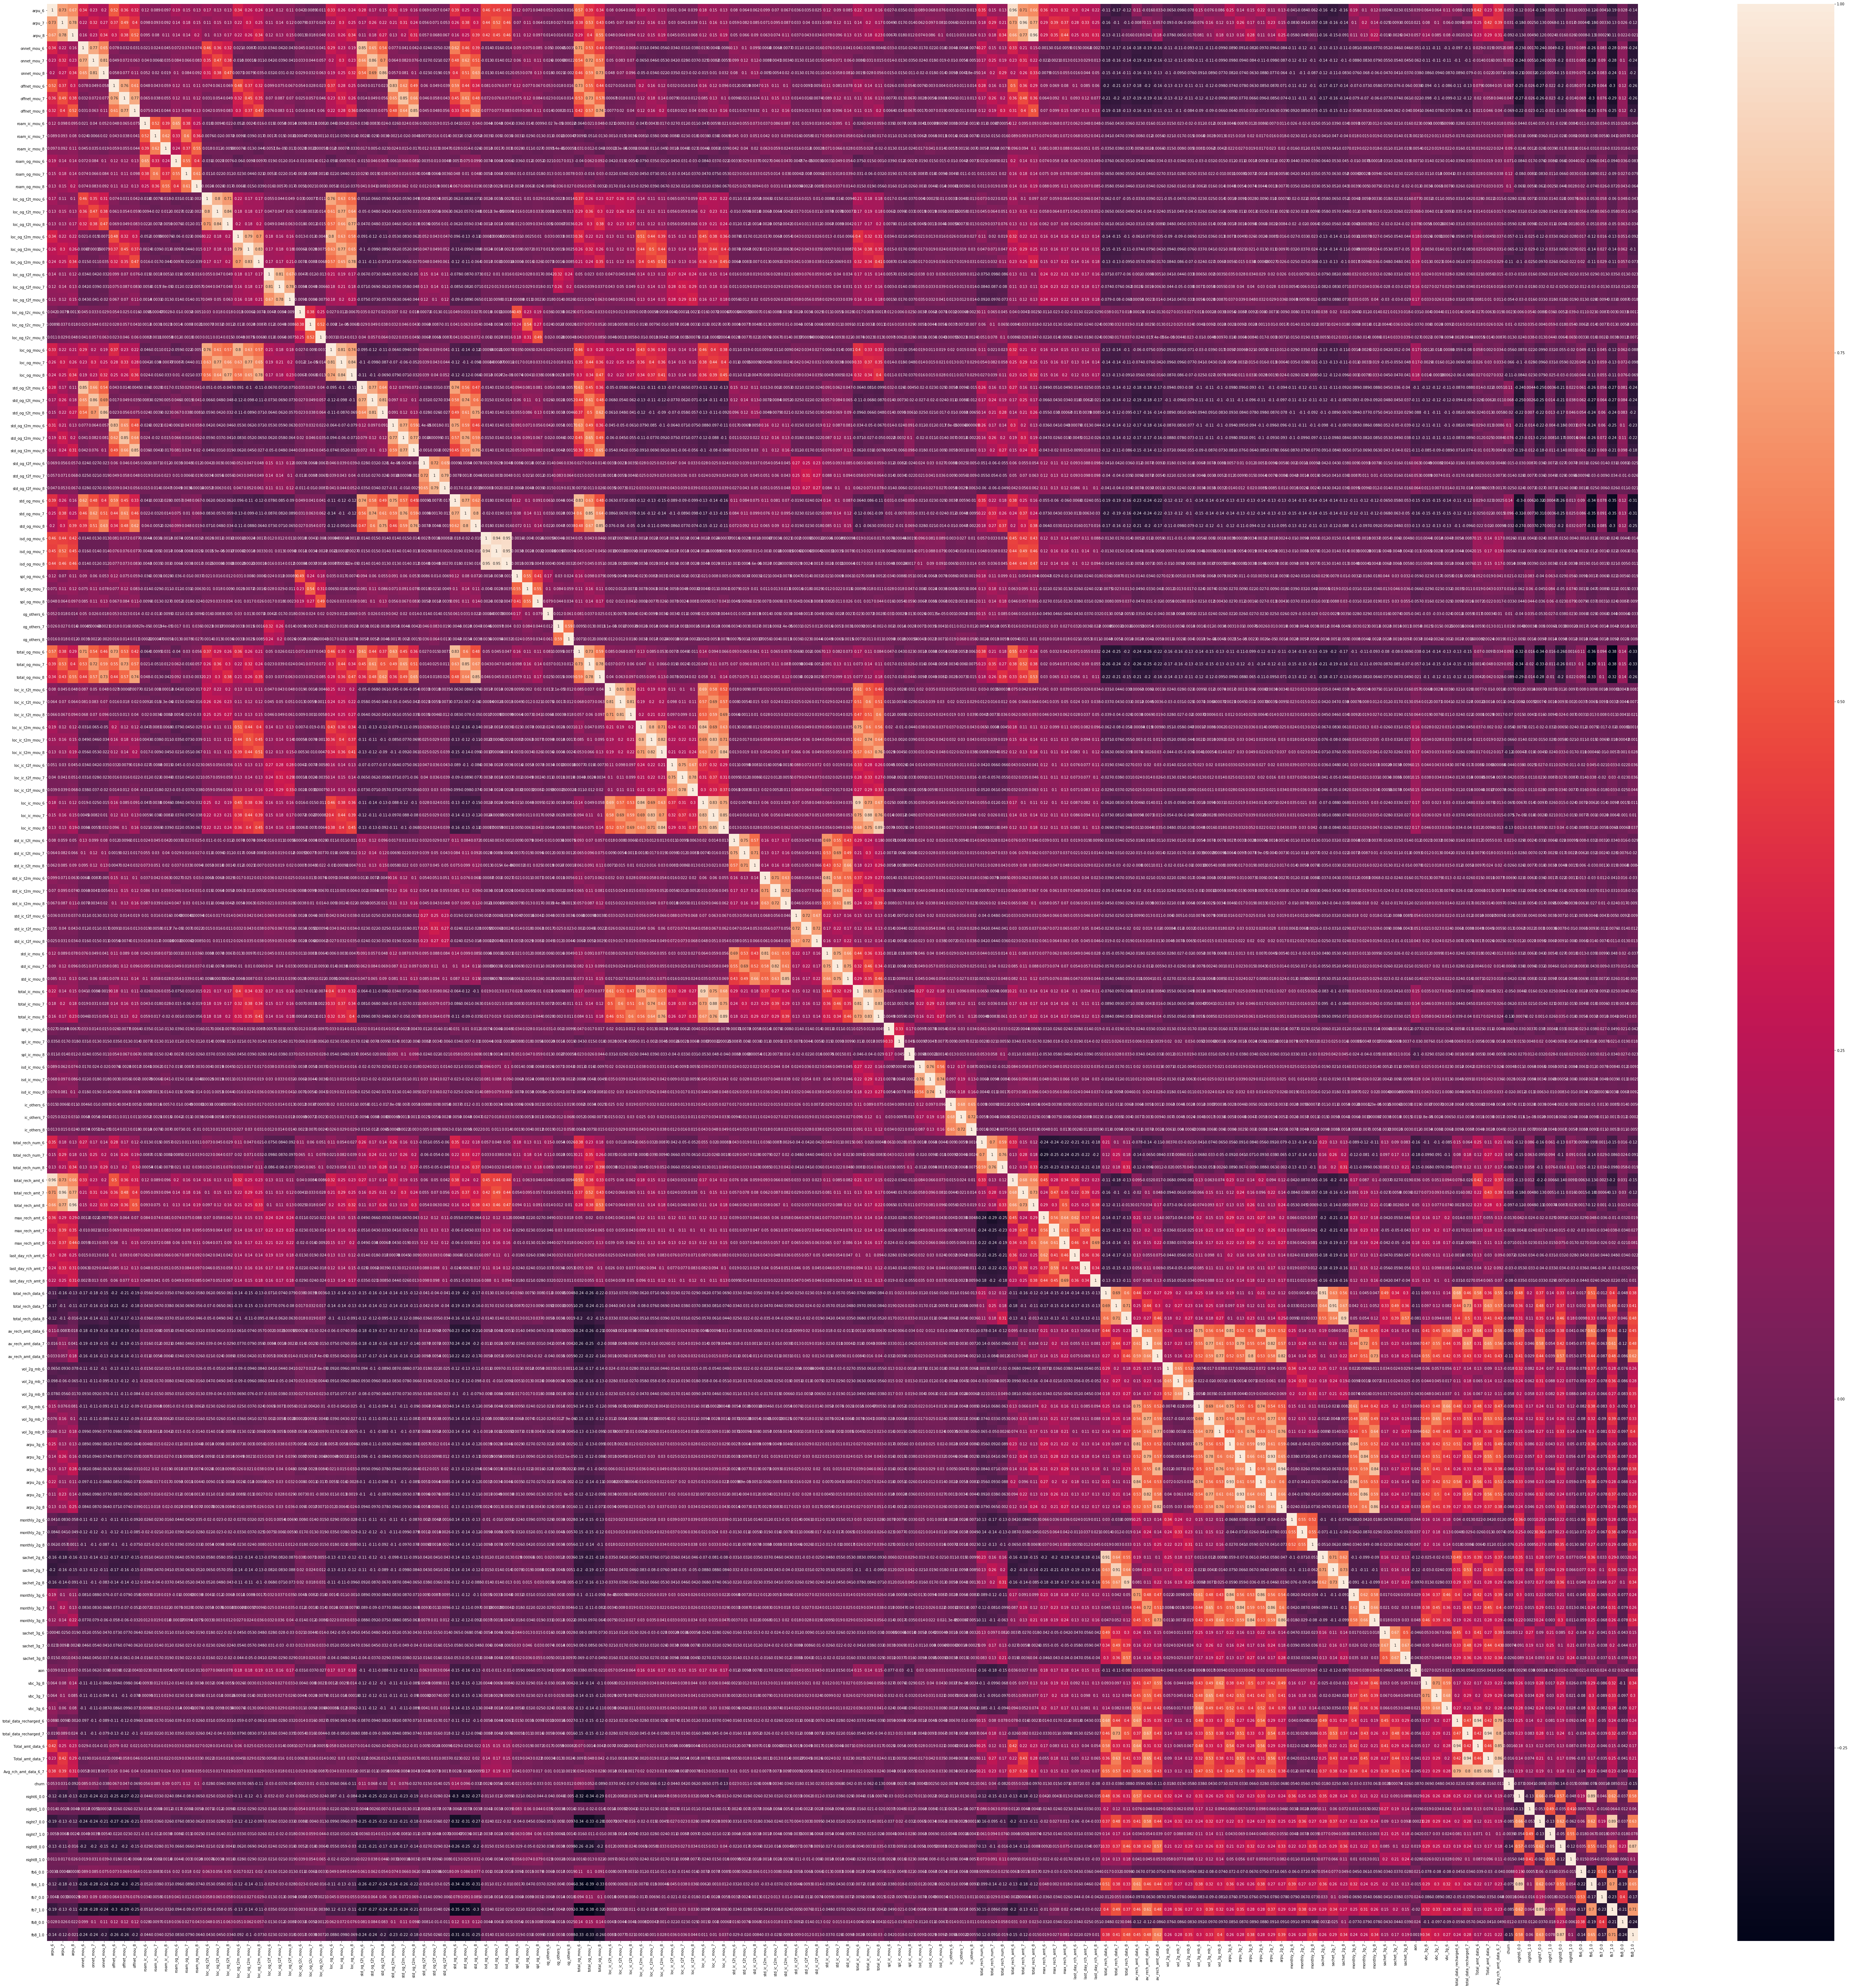

In [52]:
fig,axes = plt.subplots(figsize = (100,100))
sns.heatmap(cust_churn_data.corr(),annot=True)

In [53]:
print(cust_churn_data['churn'].value_counts())
print(round(cust_churn_data['churn'].value_counts()*100/cust_churn_data.shape[0], 2))

0    26625
1     1538
Name: churn, dtype: int64
0    94.54
1     5.46
Name: churn, dtype: float64


Text(0.5, 1.0, 'Churn Distribution')

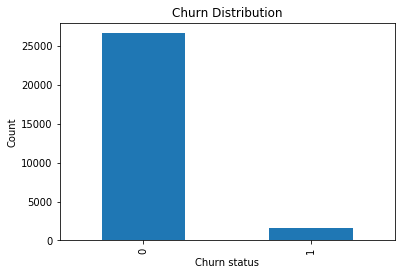

In [54]:
plt.figure(figsize=(6,4))
cust_churn_data['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn Distribution',fontsize=12)

In [55]:
#From the above results; it shows class imbalance into it

In [56]:
cust_churn_data['date_of_last_rech_6'] = pd.to_datetime(cust_churn_data['date_of_last_rech_6'])
cust_churn_data['date_of_last_rech_7'] = pd.to_datetime(cust_churn_data['date_of_last_rech_7'])
cust_churn_data['date_of_last_rech_8'] = pd.to_datetime(cust_churn_data['date_of_last_rech_8'])


# Now let's create new features from date column
cust_churn_data['date_of_last_rech_day_6'] = cust_churn_data['date_of_last_rech_6'].dt.day
cust_churn_data['date_of_last_rech_dayofwk_6'] = cust_churn_data['date_of_last_rech_6'].dt.dayofweek.astype(str)

cust_churn_data['date_of_last_rech_day_7'] = cust_churn_data['date_of_last_rech_7'].dt.day
cust_churn_data['date_of_last_rech_dayofwk_7'] = cust_churn_data['date_of_last_rech_7'].dt.dayofweek.astype(str)

cust_churn_data['date_of_last_rech_day_8'] = cust_churn_data['date_of_last_rech_8'].dt.day
cust_churn_data['date_of_last_rech_dayofwk_8'] = cust_churn_data['date_of_last_rech_8'].dt.dayofweek.astype(str)

cust_churn_data = cust_churn_data.drop(['date_of_last_rech_day_6', 'date_of_last_rech_day_7', 'date_of_last_rech_day_8'], axis = 1)

In [57]:
cust_churn_data['AVG_arpu_6_7'] = cust_churn_data[['arpu_6','arpu_7']].mean(axis=1)
cust_churn_data['is_arpu_flag'] = np.where((cust_churn_data['arpu_8'] > cust_churn_data['AVG_arpu_6_7']), 0, 1)

cust_churn_data['AVG_onnet_mou_6_7'] = cust_churn_data[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
cust_churn_data['is_onnet_mou_flag'] = np.where((cust_churn_data['onnet_mou_8'] > cust_churn_data['AVG_onnet_mou_6_7']), 0, 1)

cust_churn_data['AVG_offnet_mou_6_7'] = cust_churn_data[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
cust_churn_data['is_offnet_mou_flag'] = np.where((cust_churn_data['offnet_mou_8'] > cust_churn_data['AVG_offnet_mou_6_7']), 0, 1)

cust_churn_data['AVG_roam_ic_mou_6_7'] = cust_churn_data[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
cust_churn_data['is_roam_ic_mou_flag'] = np.where((cust_churn_data['roam_ic_mou_8'] > cust_churn_data['AVG_roam_ic_mou_6_7']), 0, 1)

cust_churn_data['AVG_roam_og_mou_6_7'] = cust_churn_data[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
cust_churn_data['is_roam_og_mou_flag'] = np.where((cust_churn_data['roam_og_mou_8'] > cust_churn_data['AVG_roam_og_mou_6_7']), 0, 1)

cust_churn_data['AVG_loc_og_t2t_mou_6_7'] = cust_churn_data[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
cust_churn_data['is_loc_og_t2t_mou_flag'] = np.where((cust_churn_data['loc_og_t2t_mou_8'] > cust_churn_data['AVG_loc_og_t2t_mou_6_7']), 0, 1)

cust_churn_data['AVG_loc_og_t2m_mou_6_7'] = cust_churn_data[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
cust_churn_data['is_loc_og_t2m_mou_flag'] = np.where((cust_churn_data['loc_og_t2m_mou_8'] > cust_churn_data['AVG_loc_og_t2m_mou_6_7']), 0, 1)

cust_churn_data['AVG_loc_og_t2f_mou_6_7'] = cust_churn_data[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
cust_churn_data['is_loc_og_t2f_mou_flag'] = np.where((cust_churn_data['loc_og_t2f_mou_8'] > cust_churn_data['AVG_loc_og_t2f_mou_6_7']), 0, 1)

cust_churn_data['AVG_loc_og_t2c_mou_6_7'] = cust_churn_data[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
cust_churn_data['is_loc_og_t2c_mou_flag'] = np.where((cust_churn_data['loc_og_t2c_mou_8'] > cust_churn_data['AVG_loc_og_t2c_mou_6_7']), 0, 1)

cust_churn_data['AVG_std_og_t2t_mou_6_7'] = cust_churn_data[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
cust_churn_data['is_std_og_t2t_mou_flag'] = np.where((cust_churn_data['std_og_t2t_mou_8'] > cust_churn_data['AVG_std_og_t2t_mou_6_7']), 0, 1)

cust_churn_data['AVG_std_og_t2m_mou_6_7'] = cust_churn_data[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
cust_churn_data['is_std_og_t2m_mou_flag'] = np.where((cust_churn_data['std_og_t2m_mou_8'] > cust_churn_data['AVG_std_og_t2m_mou_6_7']), 0, 1)

cust_churn_data['AVG_std_og_t2f_mou_6_7'] = cust_churn_data[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
cust_churn_data['is_std_og_t2f_mou_flag'] = np.where((cust_churn_data['std_og_t2f_mou_8'] > cust_churn_data['AVG_std_og_t2f_mou_6_7']), 0, 1)

cust_churn_data['AVG_isd_og_mou_6_7'] = cust_churn_data[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
cust_churn_data['is_isd_og_mou_flag'] = np.where((cust_churn_data['isd_og_mou_8'] > cust_churn_data['AVG_isd_og_mou_6_7']), 0, 1)

cust_churn_data['AVG_spl_og_mou_6_7'] = cust_churn_data[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
cust_churn_data['is_spl_og_mou_flag'] = np.where((cust_churn_data['spl_og_mou_8'] > cust_churn_data['AVG_spl_og_mou_6_7']), 0, 1)

cust_churn_data['AVG_og_others_6_7'] = cust_churn_data[['og_others_6','og_others_7']].mean(axis=1)
cust_churn_data['is_og_others_flag'] = np.where((cust_churn_data['og_others_8'] > cust_churn_data['AVG_og_others_6_7']), 0, 1)


cust_churn_data['AVG_loc_ic_t2t_mou_6_7'] = cust_churn_data[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
cust_churn_data['is_loc_ic_t2t_mou_flag'] = np.where((cust_churn_data['loc_ic_t2t_mou_8'] > cust_churn_data['AVG_loc_ic_t2t_mou_6_7']), 0, 1)

cust_churn_data['AVG_loc_ic_t2m_mou_6_7'] = cust_churn_data[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
cust_churn_data['is_loc_ic_t2m_mou_flag'] = np.where((cust_churn_data['loc_ic_t2m_mou_8'] > cust_churn_data['AVG_loc_ic_t2m_mou_6_7']), 0, 1)

cust_churn_data['AVG_loc_ic_t2f_mou_6_7'] = cust_churn_data[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
cust_churn_data['is_loc_ic_t2f_mou_flag'] = np.where((cust_churn_data['loc_ic_t2f_mou_8'] > cust_churn_data['AVG_loc_ic_t2f_mou_6_7']), 0, 1)

cust_churn_data['AVG_std_ic_t2t_mou_6_7'] = cust_churn_data[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
cust_churn_data['is_std_ic_t2t_mou_flag'] = np.where((cust_churn_data['std_ic_t2t_mou_8'] > cust_churn_data['AVG_std_ic_t2t_mou_6_7']), 0, 1)

cust_churn_data['AVG_std_ic_t2m_mou_6_7'] = cust_churn_data[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
cust_churn_data['is_std_ic_t2m_mou_flag'] = np.where((cust_churn_data['std_ic_t2m_mou_8'] > cust_churn_data['AVG_std_ic_t2m_mou_6_7']), 0, 1)

cust_churn_data['AVG_std_ic_t2f_mou_6_7'] = cust_churn_data[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
cust_churn_data['is_std_ic_t2f_mou_flag'] = np.where((cust_churn_data['std_ic_t2f_mou_8'] > cust_churn_data['AVG_std_ic_t2f_mou_6_7']), 0, 1)

cust_churn_data['AVG_spl_ic_mou_6_7'] = cust_churn_data[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
cust_churn_data['is_spl_ic_mou_flag'] = np.where((cust_churn_data['spl_ic_mou_8'] > cust_churn_data['AVG_spl_ic_mou_6_7']), 0, 1)

cust_churn_data['AVG_isd_ic_mou_6_7'] = cust_churn_data[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
cust_churn_data['is_isd_ic_mou_flag'] = np.where((cust_churn_data['isd_ic_mou_8'] > cust_churn_data['AVG_isd_ic_mou_6_7']), 0, 1)

cust_churn_data['AVG_ic_others_6_7'] = cust_churn_data[['ic_others_6','ic_others_7']].mean(axis=1)
cust_churn_data['is_ic_others_flag'] = np.where((cust_churn_data['ic_others_8'] > cust_churn_data['AVG_ic_others_6_7']), 0, 1)

cust_churn_data['AVG_total_rech_amt_6_7'] = cust_churn_data[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
cust_churn_data['is_total_rech_amt_flag'] = np.where((cust_churn_data['total_rech_amt_8'] > cust_churn_data['AVG_total_rech_amt_6_7']), 0, 1)

cust_churn_data['AVG_vol_2g_mb_6_7'] = cust_churn_data[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
cust_churn_data['is_vol_2g_mb_flag'] = np.where((cust_churn_data['vol_2g_mb_8'] > cust_churn_data['AVG_vol_2g_mb_6_7']), 0, 1)

cust_churn_data['AVG_vol_3g_mb_6_7'] = cust_churn_data[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
cust_churn_data['is_vol_3g_mb_flag'] = np.where((cust_churn_data['vol_3g_mb_8'] > cust_churn_data['AVG_vol_3g_mb_6_7']), 0, 1)

cust_churn_data['AVG_arpu_3g_6_7'] = cust_churn_data[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
cust_churn_data['is_arpu_3g_flag'] = np.where((cust_churn_data['arpu_3g_8'] > cust_churn_data['AVG_arpu_3g_6_7']), 0, 1)

cust_churn_data['AVG_arpu_2g_6_7'] = cust_churn_data[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
cust_churn_data['is_arpu_2g_flag'] = np.where((cust_churn_data['arpu_2g_8'] > cust_churn_data['AVG_arpu_2g_6_7']), 0, 1)

cust_churn_data['AVG_vbc_3g_6_7'] = cust_churn_data[['vbc_3g_6','vbc_3g_7']].mean(axis=1)
cust_churn_data['is_vbc_3g_flag'] = np.where((cust_churn_data['vbc_3g_8'] > cust_churn_data['AVG_vbc_3g_6_7']), 0, 1)

cust_churn_data['AVG_loc_og_mou_6_7'] = cust_churn_data[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
cust_churn_data['is_loc_og_mou_flag'] = np.where((cust_churn_data['loc_og_mou_8'] > cust_churn_data['AVG_loc_og_mou_6_7']), 0, 1)

cust_churn_data['AVG_std_og_mou_6_7'] = cust_churn_data[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
cust_churn_data['is_std_og_mou_flag'] = np.where((cust_churn_data['std_og_mou_8'] > cust_churn_data['AVG_std_og_mou_6_7']), 0, 1)

cust_churn_data['AVG_total_og_mou_6_7'] = cust_churn_data[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
cust_churn_data['is_total_og_mou_flag'] = np.where((cust_churn_data['total_og_mou_8'] > cust_churn_data['AVG_total_og_mou_6_7']), 0, 1)

cust_churn_data['AVG_loc_ic_mou_6_7'] = cust_churn_data[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
cust_churn_data['is_loc_ic_mou_flag'] = np.where((cust_churn_data['loc_ic_mou_8'] > cust_churn_data['AVG_loc_ic_mou_6_7']), 0, 1)

cust_churn_data['AVG_std_ic_mou_6_7'] = cust_churn_data[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
cust_churn_data['is_std_ic_mou_flag'] = np.where((cust_churn_data['std_ic_mou_8'] > cust_churn_data['AVG_std_ic_mou_6_7']), 0, 1)

cust_churn_data['AVG_total_ic_mou_6_7'] = cust_churn_data[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
cust_churn_data['is_total_ic_mou_flag'] = np.where((cust_churn_data['total_ic_mou_8'] > cust_churn_data['AVG_total_ic_mou_6_7']), 0, 1)

cust_churn_data['AVG_monthly_2g_6_7'] = cust_churn_data[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
cust_churn_data['is_monthly_2g_flag'] = np.where((cust_churn_data['monthly_2g_8'] > cust_churn_data['AVG_monthly_2g_6_7']), 0, 1)

cust_churn_data['AVG_sachet_2g_6_7'] = cust_churn_data[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
cust_churn_data['is_sachet_2g_flag'] = np.where((cust_churn_data['sachet_2g_8'] > cust_churn_data['AVG_sachet_2g_6_7']), 0, 1)

cust_churn_data['AVG_monthly_3g_6_7'] = cust_churn_data[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
cust_churn_data['is_monthly_3g_flag'] = np.where((cust_churn_data['monthly_3g_8'] > cust_churn_data['AVG_monthly_3g_6_7']), 0, 1)

cust_churn_data['AVG_sachet_3g_6_7'] = cust_churn_data[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
cust_churn_data['is_sachet_3g_flag'] = np.where((cust_churn_data['sachet_3g_8'] > cust_churn_data['AVG_sachet_3g_6_7']), 0, 1)

cust_churn_data['AVG_max_rech_amt_6_7'] = cust_churn_data[['max_rech_amt_6','max_rech_amt_7']].mean(axis=1)
cust_churn_data['is_max_rech_amt_flag'] = np.where((cust_churn_data['max_rech_amt_8'] > cust_churn_data['AVG_max_rech_amt_6_7']), 0, 1)

cust_churn_data['AVG_total_rech_data_6_7'] = cust_churn_data[['total_rech_data_6','total_rech_data_7']].mean(axis=1)
cust_churn_data['is_total_rech_data_flag'] = np.where((cust_churn_data['total_rech_data_8'] > cust_churn_data['AVG_total_rech_data_6_7']), 0, 1)

cust_churn_data['AVG_av_rech_amt_data_6_7'] = cust_churn_data[['av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)
cust_churn_data['is_av_rech_amt_data_flag'] = np.where((cust_churn_data['av_rech_amt_data_8'] > cust_churn_data['AVG_av_rech_amt_data_6_7']), 0, 1)

In [58]:
cust_churn_data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
33              0.00              0.00              0.00              0.00   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   
33              0.00               0.0               0.0              0.56   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   
33          0.00          0.00          0.00              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   
33              0.00              0.00              0.00              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00              0.00   
33              0.00      

In [59]:
cust_churn_data.shape

(28163, 246)

In [60]:
cust_churn_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 7 to 99997
Data columns (total 246 columns):
arpu_6                         28163 non-null float64
arpu_7                         28163 non-null float64
arpu_8                         28163 non-null float64
onnet_mou_6                    28163 non-null float64
onnet_mou_7                    28163 non-null float64
onnet_mou_8                    28163 non-null float64
offnet_mou_6                   28163 non-null float64
offnet_mou_7                   28163 non-null float64
offnet_mou_8                   28163 non-null float64
roam_ic_mou_6                  28163 non-null float64
roam_ic_mou_7                  28163 non-null float64
roam_ic_mou_8                  28163 non-null float64
roam_og_mou_6                  28163 non-null float64
roam_og_mou_7                  28163 non-null float64
roam_og_mou_8                  28163 non-null float64
loc_og_t2t_mou_6               28163 non-null float64
loc_og_t2t_mou_7          

In [61]:
#Dropping fields from month 6 and 7 for which average fields are already derived as above

fields_to_drop = ['arpu_6','arpu_7', 
'onnet_mou_6','onnet_mou_7', 
'offnet_mou_6','offnet_mou_7', 
'roam_ic_mou_6','roam_ic_mou_7', 
'roam_og_mou_6','roam_og_mou_7', 
'loc_og_t2t_mou_6','loc_og_t2t_mou_7', 
'loc_og_t2m_mou_6','loc_og_t2m_mou_7', 
'loc_og_t2f_mou_6','loc_og_t2f_mou_7', 
'loc_og_t2c_mou_6','loc_og_t2c_mou_7', 
'std_og_t2t_mou_6','std_og_t2t_mou_7', 
'std_og_t2m_mou_6','std_og_t2m_mou_7', 
'std_og_t2f_mou_6','std_og_t2f_mou_7', 
'isd_og_mou_6','isd_og_mou_7', 
'spl_og_mou_6','spl_og_mou_7', 
'og_others_6','og_others_7', 
'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7', 
'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7', 
'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 
'std_ic_t2t_mou_6','std_ic_t2t_mou_7', 
'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 
'std_ic_t2f_mou_6','std_ic_t2f_mou_7', 
'spl_ic_mou_6','spl_ic_mou_7', 
'isd_ic_mou_6','isd_ic_mou_7', 
'ic_others_6','ic_others_7', 
'total_rech_amt_6','total_rech_amt_7', 
'vol_2g_mb_6','vol_2g_mb_7', 
'vol_3g_mb_6','vol_3g_mb_7', 
'arpu_3g_6','arpu_3g_7', 
'arpu_2g_6','arpu_2g_7', 
'vbc_3g_6','vbc_3g_7', 
'loc_og_mou_6','loc_og_mou_7', 
'std_og_mou_6','std_og_mou_7', 
'total_og_mou_6','total_og_mou_7', 
'loc_ic_mou_6','loc_ic_mou_7', 
'std_ic_mou_6','std_ic_mou_7', 
'total_ic_mou_6','total_ic_mou_7', 
'monthly_2g_6','monthly_2g_7', 
'sachet_2g_6','sachet_2g_7', 
'monthly_3g_6','monthly_3g_7', 
'sachet_3g_6','sachet_3g_7', 
'max_rech_amt_6', 'max_rech_amt_7', 
'total_rech_data_6', 'total_rech_data_7', 
'av_rech_amt_data_6', 'av_rech_amt_data_7', 
'total_data_recharged_6', 'total_data_recharged_7', 
'Total_amt_data_6', 'Total_amt_data_7', 
'Avg_rch_amt_data_6_7']

cust_churn_data = cust_churn_data.drop(fields_to_drop, 1)

In [62]:
cust_churn_data.shape

(28163, 155)

## Feature Selection

In [63]:
# Dropping date related features as we derived new features out of it
cust_churn_data.drop(list(cust_churn_data.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)

In [64]:
# Dropping object related features as we derived new features out of it
cust_churn_data.drop(list(cust_churn_data.select_dtypes(include=['object']).columns),axis=1,inplace=True)

In [65]:
cust_churn_data.shape

(28163, 149)

## Modelling

In [66]:
# Creating X and y Variable
X = cust_churn_data.drop(['churn'], axis =1)
y = cust_churn_data['churn']

In [67]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, train_size = 0.7, random_state = 42)

In [69]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(19714, 148)
(19714,)
(8449, 148)
(19714,)


In [70]:
#Checking the imbalance in data

y_train_imbalance = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imbalance = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imbalance))
print("Imbalance in Test Data: {}".format(y_test_imbalance))

Imbalance in Train Data: 0.059322944653412146
Imbalance in Test Data: 0.05414847161572053


## PCA

In [71]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state = 100)

In [72]:
# Doing the PCA on training set
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [73]:
pca.components_

array([[-5.22559882e-02, -1.23785581e-01, -1.14398950e-01, ...,
        -8.19387416e-02,  2.02561181e-01, -9.59632050e-02],
       [ 2.20996008e-01,  9.72672196e-02,  1.45803054e-01, ...,
        -5.59078984e-02,  7.16252657e-02, -5.87344505e-02],
       [-7.74515658e-02, -1.31610233e-01, -7.06639377e-02, ...,
         1.03656103e-01, -1.79206603e-02,  1.00162505e-01],
       ...,
       [ 0.00000000e+00, -1.35352882e-15, -8.79219787e-16, ...,
         1.17266782e-16,  1.58890182e-17, -7.85374897e-17],
       [ 0.00000000e+00, -5.28697293e-16,  2.01692542e-16, ...,
        -1.66538993e-16,  2.48438233e-16,  2.97049565e-16],
       [ 0.00000000e+00, -1.41760704e-16, -3.21326043e-16, ...,
         1.39239746e-16,  1.35675781e-16,  6.15363871e-17]])

In [74]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

PC1       PC2           Feature
0 -0.052256  0.220996            arpu_8
1 -0.123786  0.097267       onnet_mou_8
2 -0.114399  0.145803      offnet_mou_8
3 -0.009994  0.006765     roam_ic_mou_8
4 -0.026107  0.016992     roam_og_mou_8
5 -0.039578  0.102065  loc_og_t2t_mou_8
6 -0.044461  0.162408  loc_og_t2m_mou_8
7 -0.005331  0.083157  loc_og_t2f_mou_8
8 -0.012836  0.019773  loc_og_t2c_mou_8
9 -0.053879  0.173253      loc_og_mou_8

In [75]:
pca.explained_variance_ratio_

array([9.48493961e-02, 7.57814277e-02, 5.14057751e-02, 4.59065222e-02,
       3.74273273e-02, 2.88123657e-02, 2.60301643e-02, 2.34735593e-02,
       2.15019003e-02, 2.00591963e-02, 1.91529091e-02, 1.81939115e-02,
       1.70489490e-02, 1.58721135e-02, 1.55651895e-02, 1.51521782e-02,
       1.41759208e-02, 1.38093690e-02, 1.35011639e-02, 1.28703951e-02,
       1.22923307e-02, 1.17431385e-02, 1.17267319e-02, 1.13513295e-02,
       1.07299003e-02, 1.05675665e-02, 1.02254766e-02, 1.01047056e-02,
       9.93789116e-03, 9.46972519e-03, 9.34104780e-03, 9.16405759e-03,
       8.63908460e-03, 8.45860740e-03, 8.12728681e-03, 7.76523138e-03,
       7.60344918e-03, 7.20730408e-03, 6.93802440e-03, 6.84003232e-03,
       6.81834668e-03, 6.69729123e-03, 6.49992142e-03, 6.34932669e-03,
       6.29444267e-03, 6.01416631e-03, 5.84573478e-03, 5.60520349e-03,
       5.53382054e-03, 5.43190576e-03, 5.38387147e-03, 5.37380402e-03,
       5.22943922e-03, 5.20567193e-03, 5.17612224e-03, 5.08943066e-03,
      

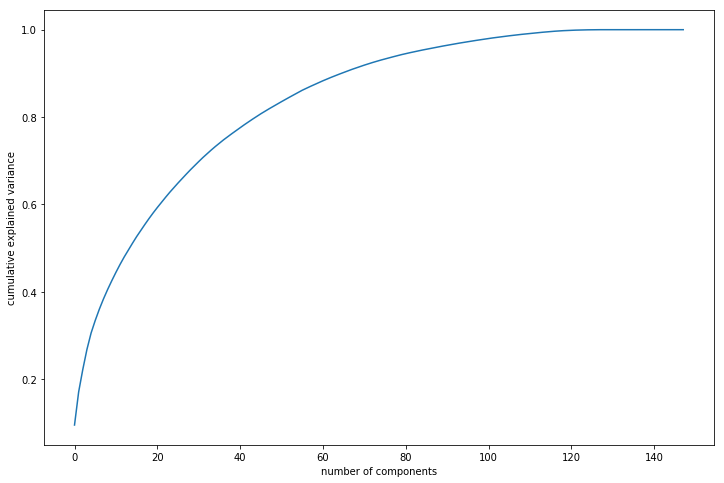

In [76]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [77]:
print (pca.explained_variance_ratio_.cumsum())

[0.0948494  0.17063082 0.2220366  0.26794312 0.30537045 0.33418281
 0.36021298 0.38368654 0.40518844 0.42524763 0.44440054 0.46259445
 0.4796434  0.49551552 0.51108071 0.52623289 0.54040881 0.55421817
 0.56771934 0.58058973 0.59288206 0.6046252  0.61635194 0.62770326
 0.63843316 0.64900073 0.65922621 0.66933091 0.6792688  0.68873853
 0.69807958 0.70724364 0.71588272 0.72434133 0.73246861 0.74023385
 0.74783729 0.7550446  0.76198262 0.76882266 0.775641   0.78233829
 0.78883821 0.79518754 0.80148198 0.80749615 0.81334189 0.81894709
 0.82448091 0.82991281 0.83529669 0.84067049 0.84589993 0.8511056
 0.85628172 0.86137115 0.86596371 0.87031538 0.87464164 0.87892196
 0.88307867 0.88709132 0.89100982 0.89480446 0.89845802 0.90207927
 0.90563908 0.90914233 0.9124323  0.915702   0.91890601 0.92199144
 0.9249176  0.92781464 0.93047677 0.93307516 0.93561374 0.9381108
 0.94057994 0.94297614 0.94521498 0.94731138 0.94937715 0.95141657
 0.95339095 0.95527208 0.95714279 0.95899104 0.96080645 0.962606

In [78]:
#Using incremental PCA for efficiency; lets use 45 fields initial to predict
from sklearn.decomposition import IncrementalPCA
pca_new = IncrementalPCA(n_components=45)

In [79]:
cust_churn_data_train_pca = pca_new.fit_transform(X_train)
print(cust_churn_data_train_pca.shape)

cust_churn_data_test_pca = pca_new.fit_transform(X_test)
print(cust_churn_data_test_pca.shape)

(19714, 45)
(8449, 45)


## Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
log_Regression = LogisticRegression()
log_Regression.fit(cust_churn_data_train_pca, y_train)

#Predicted Probabilities
y_pred = log_Regression.predict(cust_churn_data_test_pca)
y_pred_churn_df = pd.DataFrame(y_pred) 

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [82]:
print(confusion_matrix(y_pred, y_test))

[[7995  433]
 [  20    1]]


In [83]:
print("LogisticRegression accuracy with PCA: ", accuracy_score(y_test, y_pred))

LogisticRegression accuracy with PCA:  0.9463841874778081


In [84]:
#Here we have used 45 variables to predict; which could explain 94% of variance in the dataset
# lets try with less components: 35

In [85]:
pca_round1 = PCA(n_components=35)
cust_train_pcar1 = pca_round1.fit_transform(X_train)
cust_test_pcar1 = pca_round1.transform(X_test)
print(cust_train_pcar1.shape)
print(cust_test_pcar1.shape)

(19714, 35)
(8449, 35)


In [86]:
#traing the model with the above data and calculate the accuracy score

log_Regression_r1 = LogisticRegression()
log_Regression_r1.fit(cust_train_pcar1, y_train)

#Predicted Probabilities
y_pred_r1 = log_Regression_r1.predict(cust_test_pcar1)

print("LogisticRegression accuracy with PCA_round1 - 35 components: ", accuracy_score(y_test, y_pred_r1))

LogisticRegression accuracy with PCA_round1 - 35 components:  0.9489880459225943


In [87]:
#Here we have used 45 & 35 variables to predict; which could explain 94% of variance in the dataset
# lets try with less components: 15

In [88]:
pca_round2 = PCA(n_components=15)
cust_train_pcar2 = pca_round2.fit_transform(X_train)
cust_test_pcar2 = pca_round2.transform(X_test)
print(cust_train_pcar2.shape)
print(cust_test_pcar2.shape)

#traing the model with the above data and calculate the accuracy score

log_Regression_r2 = LogisticRegression()
log_Regression_r2.fit(cust_train_pcar2, y_train)

#Predicted Probabilities
y_pred_r2 = log_Regression_r2.predict(cust_test_pcar2)

print("LogisticRegression accuracy with PCA_round1 - 15 components: ", accuracy_score(y_test, y_pred_r2))

(19714, 15)
(8449, 15)
LogisticRegression accuracy with PCA_round1 - 15 components:  0.9481595455083441


In [89]:
#Random Forest modelling with 45 PCA components

from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")


In [90]:
TrainedRFC= RFC_balanced.fit(cust_churn_data_train_pca,y_train)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_i

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8015
           1       0.25      0.54      0.34       434

   micro avg       0.89      0.89      0.89      8449
   macro avg       0.61      0.73      0.64      8449
weighted avg       0.94      0.89      0.91      8449

Accuracy for the test dataset 89.1%
ROC for the test dataset 83.4%


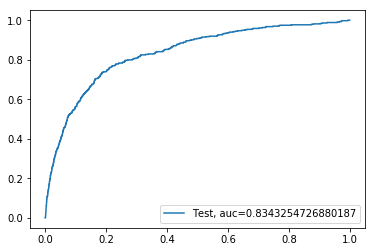

In [91]:
preds_RFC=TrainedRFC.predict(cust_churn_data_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(cust_churn_data_test_pca)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [92]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

colName               value
0   0.236379       roam_ic_mou_8
1   0.221422         onnet_mou_8
2   0.085724              arpu_8
3   0.034279        offnet_mou_8
4   0.028899    loc_og_t2t_mou_8
5   0.028732         ic_others_8
6   0.020077         vol_3g_mb_8
7   0.018922       roam_og_mou_8
8   0.018695        spl_og_mou_8
9   0.016235      total_ic_mou_8
10  0.015638    loc_ic_t2f_mou_8
11  0.015585        std_og_mou_8
12  0.013752      max_rech_amt_8
13  0.013718    loc_og_t2m_mou_8
14  0.013183        loc_ic_mou_8
15  0.013107    std_og_t2m_mou_8
16  0.012633        loc_og_mou_8
17  0.012528      total_og_mou_8
18  0.011801    loc_og_t2c_mou_8
19  0.011779    std_og_t2t_mou_8
20  0.011430    std_ic_t2m_mou_8
21  0.011352    loc_ic_t2t_mou_8
22  0.010781         og_others_8
23  0.010499    loc_og_t2f_mou_8
24  0.007724        std_ic_mou_8
25  0.007634    total_rech_num_6
26  0.007588    std_ic_t2f_mou_8
27  0.006879        isd_ic_mou_8
28  0.006858           arpu_2g_8
29  0.006726  last_day_rch_amt_8
30  0.006544  av_rech_amt_data_8
31  0.006365  last_day_rch_amt_7
32  0.006207        monthly_2g_8
33  0.006158    total_rech_num_7
34  0.005849    total_rech_amt_8
35  0.005723    total_rech_num_8
36  0.005504    loc_ic_t2m_mou_8
37  0.004630  last_day_rch_amt_6
38  0.004626        isd_og_mou_8
39  0.004417    std_ic_t2t_mou_8
40  0.003431         vol_2g_mb_8
41  0.003095   total_rech_data_8
42  0.002694    std_og_t2f_mou_8
43  0.002371        spl_ic_mou_8
44  0.001829           arpu_3g_8

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_i

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8015
           1       0.22      0.74      0.33       434

   micro avg       0.85      0.85      0.85      8449
   macro avg       0.60      0.80      0.62      8449
weighted avg       0.94      0.85      0.88      8449

Accuracy for the test dataset 84.8%
ROC for the test dataset 87.1%


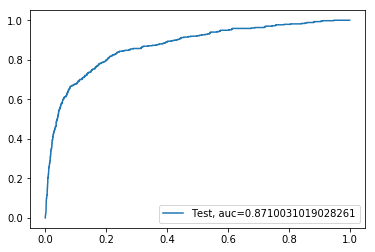

In [93]:
#Random Forest modelling with 15 PCA components

TrainedRFC= RFC_balanced.fit(cust_train_pcar2,y_train)

preds_RFC=TrainedRFC.predict(cust_test_pcar2)
preds_probs_RFC=TrainedRFC.predict_proba(cust_test_pcar2)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [94]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

colName             value
0   0.267111       onnet_mou_8
1   0.264234     roam_ic_mou_8
2   0.106024            arpu_8
3   0.060736     roam_og_mou_8
4   0.051089  std_og_t2f_mou_8
5   0.046545      offnet_mou_8
6   0.046274  std_og_t2m_mou_8
7   0.027273  std_og_t2t_mou_8
8   0.025306  loc_og_t2t_mou_8
9   0.020172  loc_og_t2c_mou_8
10  0.019475      loc_og_mou_8
11  0.018144      isd_og_mou_8
12  0.017991  loc_og_t2m_mou_8
13  0.015226  loc_og_t2f_mou_8
14  0.014398      std_og_mou_8